# A/B TESTING 

## Maximum Cost Bidding vs Average Cost Bidding

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats import proportion as pr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.stats.api as sms

warnings.filterwarnings ("ignore")
pd.set_option ('display.float_format', lambda x: '%.6f' % x)
pd.set_option ('display.width', None)
pd.set_option ('display.max_columns', None)

In [2]:
# Maximum Cost Bidding vs Average Cost Bidding
# https://incipia.co/post/app-marketing/facebook-ads-launches-average-cost-and-maximum-cost-bidding/

# Control Group (Maximum bidding)
control_df = pd.read_excel ("ab_testingHM1.xlsx",sheet_name="Control Group")

In [3]:
# Test Group (Average_bidding)
test_df = pd.read_excel ("ab_testingHM1.xlsx",sheet_name="Test Group")

In [4]:
control_df.shape

(40, 4)

In [5]:
control_df.head() #Max

,Impression,Click,Purchase,Earning
0,92432,6699,1397,14328
1,109816,3721,662,10807
2,92620,4585,962,11148
3,123104,5402,1023,10515
4,121473,6587,926,9573


In [6]:
6090/82529     # Conversion Rate (Donusum Orani)

0.07379224272679906

In [7]:
665/6090

0.10919540229885058

In [8]:
665/82529

0.008057773631087254

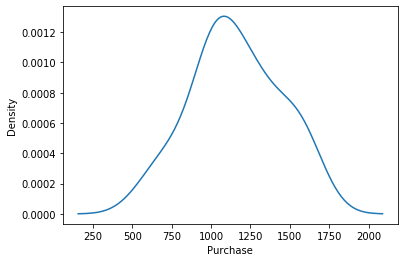

In [9]:
sns.distplot (control_df["Purchase"], hist=False)  # Normal dağılımın grafiksel gözlemlenmesi
plt.show ();

In [10]:
test_df.shape

(40, 4)

In [11]:
control_df.head() #Max Bidding

,Impression,Click,Purchase,Earning
0,92432,6699,1397,14328
1,109816,3721,662,10807
2,92620,4585,962,11148
3,123104,5402,1023,10515
4,121473,6587,926,9573


In [12]:
test_df.head() #Average Bidding

,Impression,Click,Purchase,Earning
0,138120,3153,1439,11834
1,154992,3562,1710,17867
2,123978,2996,867,15409
3,133912,4557,879,13914
4,166845,5097,1538,16970


In [13]:
702/3217

0.2182157289400062

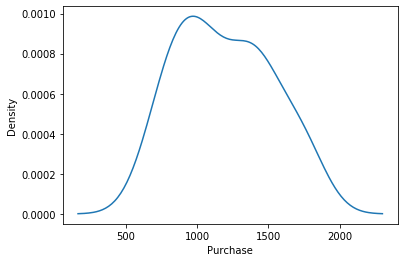

In [14]:
sns.distplot (test_df["Purchase"], hist=False)  # Normal dağılımın grafiksel gözlemlenmesi
plt.show ();

In [15]:
control_df["Earning_Per_Click"] = control_df["Earning"] / control_df["Click"]

In [16]:
control_df.head()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,92432,6699,1397,14328,2.138827
1,109816,3721,662,10807,2.904327
2,92620,4585,962,11148,2.431407
3,123104,5402,1023,10515,1.946501
4,121473,6587,926,9573,1.453317


In [17]:
test_df["Earning_Per_Click"] = test_df["Earning"] / test_df["Click"]

In [18]:
test_df.head()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,138120,3153,1439,11834,3.753251
1,154992,3562,1710,17867,5.016002
2,123978,2996,867,15409,5.143191
3,133912,4557,879,13914,3.053325
4,166845,5097,1538,16970,3.329409


In [19]:
# Another Way with for loop

# Test ve Control Grubu için Earning/Click Değişkeninin Türetilmesi
# click basina saglanan kazanc
groups = [control_df, test_df]

for group in groups:
    group["Earning_Per_Click"] = group["Earning"] / group["Click"]

control_df.head ()
test_df.head ()

,Impression,Click,Purchase,Earning,Earning_Per_Click
0,138120,3153,1439,11834,3.753251
1,154992,3562,1710,17867,5.016002
2,123978,2996,867,15409,5.143191
3,133912,4557,879,13914,3.053325
4,166845,5097,1538,16970,3.329409


In [20]:
control_df["Purchase"].describe ()

count     40.000000
mean    1157.000000
std      281.581705
min      561.000000
25%      988.000000
50%     1116.000000
75%     1340.000000
max     1684.000000
Name: Purchase, dtype: float64

In [21]:
test_df["Purchase"].describe ()

count     40.000000
mean    1193.300000
std      330.424917
min      640.000000
25%      912.000000
50%     1130.000000
75%     1434.500000
max     1825.000000
Name: Purchase, dtype: float64

In [22]:
# İki Grubun Purchase ve Earning Betimsel İstatistiklerinin Karşılaştırılması
desc_compare_df = pd.DataFrame ({"Control_Purchase": control_df["Purchase"].describe (),
                                 "Test_Purchase": test_df["Purchase"].describe ()})

In [23]:
# Test grubunun ortalaması ve medyanı yüksek olmasına rağmen, 
#   standart sapması da yüksek olduğundan anlamlı bir farklılık olup olmadığını kontrol edelim.
desc_compare_df  

,Control_Purchase,Test_Purchase
count,40.000000,40.000000
mean,1157.000000,1193.300000
std,281.581705,330.424917
min,561.000000,640.000000
25%,988.000000,912.000000
50%,1116.000000,1130.000000
75%,1340.000000,1434.500000
max,1684.000000,1825.000000


In [24]:
earning_df = pd.DataFrame ({"Control_Earning": control_df["Earning"].describe (),
                            "Test_Earning": test_df["Earning"].describe ()})
earning_df

,Control_Earning,Test_Earning
count,40.000000,40.000000
mean,11833.050000,15341.100000
std,1877.742452,1724.485353
min,7775.000000,11834.000000
25%,10451.500000,13909.500000
50%,12245.000000,15521.500000
75%,13143.750000,16847.000000
max,15481.000000,19343.000000


### Confidence Interval Evaluation

In [25]:
# Güven Aralığı Değerlendirmesi

sms.DescrStatsW (control_df["Purchase"]).tconfint_mean ()

# (508.0041754264924, 593.7839421139709) Kontrol grubu %95 güven aralığı değerleri

(1066.945802334159, 1247.054197665841)

In [26]:
sms.DescrStatsW (test_df["Purchase"]).tconfint_mean ()

# (530.5670226990062, 633.6451705979289) Test grubu %95 güven aralığı değerleri

(1087.6249853362629, 1298.975014663737)

In [29]:
control_df["Purchase"].head()

0    1397
1     662
2     962
3    1023
4     926
Name: Purchase, dtype: int64

In [30]:
# Güven Aralığı Değerlendirmesi
sms.DescrStatsW (control_df["Earning"]).tconfint_mean ()

(11232.518832271664, 12433.581167728335)

In [31]:
sms.DescrStatsW (test_df["Earning"]).tconfint_mean ()

(14789.582830076393, 15892.617169923607)

### ASSUMPTION CONTROL OF NORMALITY

In [32]:
# NORMALLIK VARSAYIMI KONTROLÜ
# H0 : Teorik normal dağılım ile örneklem normal dağılımı arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1 : Teorik normal dağılım ile örneklem normal dağılımı arasında istatistiksel olarak anlamlı bir fark vardır.
# p_value değeri 0.05'ten küçük ise H0 reddedilir.

In [33]:
from scipy.stats import shapiro

In [34]:
p_value_threshold = 0.05

In [35]:
control_df.columns

Index(['Impression', 'Click', 'Purchase', 'Earning', 'Earning_Per_Click'], dtype='object')

In [36]:
shapiro (control_df['Impression'])

ShapiroResult(statistic=0.9696733951568604, pvalue=0.35142433643341064)

In [37]:
ttest, p_value = shapiro (control_df['Impression']) # Trick

In [38]:
ttest

0.9696733951568604

In [39]:
p_value

0.35142433643341064

In [40]:
if p_value >= p_value_threshold:
    print ("Normal")
else:
    print ("Abnormal")

Normal


In [41]:
distribution_list = ("Normal")

In [42]:
pd.DataFrame(index=['Impression'], data={"P_Value": p_value, "Distribution": distribution_list})

,P_Value,Distribution
Impression,0.351424,Normal


### Automation - Normality Function

In [43]:
def normality_func(dataframe):
    from scipy.stats import shapiro
    p_value_threshold = 0.05
    p_value_list = []
    distribution_list = []
    normal_list = []
    abnormal_list = []
    for col in dataframe.columns:
        ttest, p_value = shapiro (dataframe[col])
        p_value_list.append (p_value)
        if p_value >= p_value_threshold:
            distribution_list.append ("Normal")
            normal_list.append (col)
        else:
            distribution_list.append ("Abnormal")
            abnormal_list.append (col)

    new_df = pd.DataFrame (index=dataframe.columns, data={"P_Value": p_value_list, "Distribution": distribution_list})
    return new_df, normal_list, abnormal_list



In [44]:
control_normality, control_normal_list, control_abnormal_list = normality_func (control_df)
test_normality, test_normal_list, test_abnormal_list = normality_func (test_df)


In [45]:
control_normality

,P_Value,Distribution
Impression,0.351424,Normal
Click,0.846129,Normal
Purchase,0.590674,Normal
Earning,0.531196,Normal
Earning_Per_Click,0.012829,Abnormal


In [46]:
control_normal_list

['Impression', 'Click', 'Purchase', 'Earning']

In [47]:
control_abnormal_list

['Earning_Per_Click']

### CONTROL OF VARIANCE HOMOGENEITY

In [48]:
# VARYANS HOMOJENLİĞİ KONTROLÜ

# H0: 2 grubun ilgili değişkenlerinin varyans değişkenliği arasında istatistiksel olarak anlamlı bir farklılık yoktur.
# H1: 2 grubun ilgili değişkenlerinin varyans değişkenliği arasında istatistiksel olarak anlamlı bir farklılık vardır.

# p_value değeri 0.05'ten küçük ise H0 reddedilir.

from scipy.stats import levene

ttest_lev, p_value_lev = levene (control_df["Purchase"], test_df["Purchase"])
print ("ttest istatistiği: {}\np_value: {}".format (ttest_lev, p_value_lev))

# p_value değeri 0.05'ten büyük olduğu için H0 hipotezini reddedemeyiz. 
# Dolayısıyla 2 grubun purchase değerlerinin varyans dağılımları arasında istatistiksel olarak anlamlı bir farklılık yoktur diyebiliriz.
# Biz anlamli fark arayisindayiz.


ttest istatistiği: 2.155560090094498
p_value: 0.14607588410389435


In [49]:
def variance_homogeneity(dataframe_control, dataframe_test):
    from scipy.stats import levene
    p_value_threshold = 0.05
    p_value_list = []
    variance_list = []
    column_list = list (zip (sorted (dataframe_control.columns), sorted (dataframe_test.columns)))
    features = []
    homogeneus_list = []
    not_homogeneus_list = []
    for col in column_list:
        ttest_lev, p_value_lev = levene (dataframe_control[col[0]], dataframe_test[col[1]])
        if (col[0] == col[1]) and (p_value_lev >= p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("No Difference")
            homogeneus_list.append (col[0])
            features.append (col[0])
        elif (col[0] == col[1]) and (p_value_lev < p_value_threshold):
            p_value_list.append (p_value_lev)
            variance_list.append ("Different")
            not_homogeneus_list.append (col[0])
            features.append (col[0])

    new_df = pd.DataFrame (index=features, data={"P_Value": p_value_list, "Homogeneity_of_Variance": variance_list})

    return new_df, homogeneus_list, not_homogeneus_list


variance_df, homogeneus, not_homogeneus = variance_homogeneity (control_df, test_df)

In [50]:
variance_df

,P_Value,Homogeneity_of_Variance
Click,0.002257,Different
Earning,0.490996,No Difference
Earning_Per_Click,0.253207,No Difference
Impression,0.535401,No Difference
Purchase,0.146076,No Difference


In [51]:
homogeneus

['Earning', 'Earning_Per_Click', 'Impression', 'Purchase']

In [52]:
not_homogeneus

['Click']

### INDEPENDENT TWO SAMPLE T TEST

In [53]:
# BAĞIMSIZ İKİ ÖRNEKLEM T TESTİ

# Normallik ve Varyans Homojenliği varsayımları sağlanmıştı.
# H0: Kontrol grubu purchase değişkeni ortalaması ile test grubu purchase değişkeni ortalaması arasında istatistiksel olarak anlamlı bir farklılık yoktur.
# H1: Kontrol grubu purchase değişkeni ortalaması ile test grubu purchase değişkeni ortalaması arasında istatistiksel olarak anlamlı bir farklılık vardır.
# p_value < 0.05 ise H0 reddedilir.

from scipy.stats import ttest_ind, mannwhitneyu

# Normal dağılan parametrik değişkenler için ttest, normal dağılmayan nonparametrik değişkenler için mannwhitneyu testini kullanıyoruz.
feat_dict = {}
for feat in control_normal_list:
    if feat in homogeneus:
        ttest_value, p_value = ttest_ind (control_df[feat], test_df[feat], equal_var=True)
        feat_dict[feat] = p_value
    elif feat not in homogeneus:
        ttest_value, p_value = ttest_ind (control_df[feat], test_df[feat], equal_var=False)
        feat_dict[feat] = p_value

for feat in control_abnormal_list:
    ttest_value, p_value = mannwhitneyu (control_df[feat], test_df[feat])
    feat_dict[feat] = p_value

ttest_df = pd.DataFrame (data=feat_dict.values (), index=feat_dict.keys (), columns=["Ttest_P_Value"])


In [54]:
control_df["Impression"].mean()

113916.85

In [55]:
test_df["Impression"].mean()

138589.275

In [56]:
control_df["Click"].mean()

5610.75

In [57]:
test_df["Click"].mean()

3888.25

In [58]:
(5100.625 - 3967.55) / 5100.625

0.22214434505575292

In [59]:
control_df["Purchase"].mean()

1157.0

In [60]:
test_df["Purchase"].mean()

1193.3

In [61]:
control_df["Earning"].mean()

11833.05

In [62]:
test_df["Earning"].mean()

15341.1

In [63]:
ttest_df

,Ttest_P_Value
Impression,0.000004
Click,0.000000
Purchase,0.598424
Earning,0.000000
Earning_Per_Click,0.000000


### Maximum ve Average Bidding ortalamalarını karşılaştırmak için dataframe'e ekliyoruz.


In [64]:
for col in control_df.columns:
    ttest_df.loc[ttest_df.index == col, "Maximum Bidding Mean"] = control_df[col].mean ()

In [65]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean
Impression,0.000004,113916.850000
Click,0.000000,5610.750000
Purchase,0.598424,1157.000000
Earning,0.000000,11833.050000
Earning_Per_Click,0.000000,2.301577


In [66]:
for col in test_df.columns:
    ttest_df.loc[ttest_df.index == col, "Average Bidding Mean"] = test_df[col].mean ()


In [67]:
ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean
Impression,0.000004,113916.850000,138589.275000
Click,0.000000,5610.750000,3888.250000
Purchase,0.598424,1157.000000,1193.300000
Earning,0.000000,11833.050000,15341.100000
Earning_Per_Click,0.000000,2.301577,4.159869


In [68]:
threshold = 0.05           # p_value değeri
ttest_df.loc[ttest_df["Ttest_P_Value"] < threshold, "H0_Hypothesis"] = "Rejected"
ttest_df.loc[ttest_df["Ttest_P_Value"] >= threshold, "H0_Hypothesis"] = "Not Rejected"

# Her bir değişken için iki bidding tipinin ortalamalarını karşılaştırıyoruz.
ttest_df["Winner"] = ttest_df.apply (
    lambda x: "Maximum Bidding" if (x["Maximum Bidding Mean"] >= x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "Average Bidding" if (x["Maximum Bidding Mean"] < x["Average Bidding Mean"]) & (
                x["H0_Hypothesis"] == "Rejected") else
    "No Difference", axis=1)

ttest_df

,Ttest_P_Value,Maximum Bidding Mean,Average Bidding Mean,H0_Hypothesis,Winner
Impression,0.000004,113916.850000,138589.275000,Rejected,Average Bidding
Click,0.000000,5610.750000,3888.250000,Rejected,Maximum Bidding
Purchase,0.598424,1157.000000,1193.300000,Not Rejected,No Difference
Earning,0.000000,11833.050000,15341.100000,Rejected,Average Bidding
Earning_Per_Click,0.000000,2.301577,4.159869,Rejected,Average Bidding


In [69]:
# Maksimum Maliyet Teklifi, Ortalama Maliyet Teklifi
# kontrol grubunda önce maximum maliyetle teklif verilerek gözlem yapilmis.
# sonra ortalama maliyet teklifi verilmis. 
# sonuclar arasinda anlamli fark var mi bun arastirmasini yaptik.
